# Comparaci√≥n de Clasificaci√≥n de Subjetividad y Agrupaci√≥n por Sentimiento

Este notebook realiza una comparaci√≥n exhaustiva entre los diferentes m√©todos de clasificaci√≥n de subjetividad implementados:

## M√©todos a Comparar
1. **HuggingFace (SubjetividadConHF)**: Clasificaci√≥n binaria (Subjetivo/Objetivo)
2. **An√°lisis por Frases (SubjetividadConFrases)**: Clasificaci√≥n ternaria (Subjetivo/Objetivo/Mixta)  
3. **LLM (SubjetividadConLLM)**: Clasificaci√≥n ternaria (Subjetivo/Objetivo/Mixta)

**Nota**: El m√©todo LLM originalmente usa terminolog√≠a femenina (Subjetiva/Objetiva), pero se normaliza autom√°ticamente a terminolog√≠a masculina (Subjetivo/Objetivo) para permitir comparaciones consistentes.

## An√°lisis a Realizar
- Comparaci√≥n HF vs Frases: transiciones y cambios en clasificaci√≥n
- Comparaci√≥n Frases vs LLM: an√°lisis de coincidencias entre m√©todos ternarios
- An√°lisis de discrepancias: casos donde los m√©todos difieren
- Agrupaci√≥n final por sentimiento para el m√©todo seleccionado

In [1]:
import pandas as pd
import numpy as np
import sys
from pathlib import Path

sys.path.append('../scripts')

from subjetividad import (
    cargar_datos_para_comparacion,
    realizar_comparacion_completa,
    generar_visualizaciones_completas,
    ComparadorMetodosSubjetividad,
    analizar_discrepancias_completas
)

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

print("‚úÖ Librer√≠as y m√≥dulos importados correctamente")

‚úÖ Librer√≠as y m√≥dulos importados correctamente


## 1. Carga de Datos

Cargamos el dataset con los an√°lisis de subjetividad ya realizados por los diferentes m√©todos.

In [2]:
df = cargar_datos_para_comparacion('../data/processed/dataset_opiniones_analisis.csv')

‚úÖ Dataset cargado: 2464 opiniones
üìã Columnas de subjetividad disponibles: ['SubjetividadConHF', 'SubjetividadConFrases', 'SubjetividadConLLM']

üîç Valores √∫nicos detectados:
   ‚Ä¢ SubjetividadConHF: ['Subjetivo', 'Objetivo']
   ‚Ä¢ SubjetividadConFrases: ['Mixta', 'Subjetivo', 'Objetivo']
   ‚Ä¢ SubjetividadConLLM: ['Mixta', 'Subjetiva', 'Objetiva']

‚úÖ Normalizaci√≥n aplicada a SubjetividadConLLM:
   ‚Ä¢ 'Subjetiva' ‚Üí 'Subjetivo'
   ‚Ä¢ 'Objetiva' ‚Üí 'Objetivo'
   ‚Ä¢ SubjetividadConLLM valores normalizados: ['Mixta', 'Subjetivo', 'Objetivo']


## 2. Comparaci√≥n HuggingFace vs An√°lisis por Frases

An√°lisis de transiciones entre la clasificaci√≥n binaria de HuggingFace y la clasificaci√≥n ternaria del an√°lisis por frases.

In [3]:
comparador = ComparadorMetodosSubjetividad(df)
resultados_hf_frases = comparador.comparar_hf_vs_frases()
comparador.mostrar_comparacion_hf_frases(resultados_hf_frases)

üîÑ COMPARACI√ìN: HuggingFace vs An√°lisis por Frases

üìä Tabla de Contingencia:
SubjetividadConFrases  Mixta  Objetivo  Subjetivo   All
SubjetividadConHF                                      
Objetivo                 142        50          0   192
Subjetivo               1432        13        827  2272
All                     1574        63        827  2464

üìà Transiciones desde Subjetivo (HF): 2272 opiniones
   ‚Ä¢ Permanece Subjetivo: 827 (36.4%)
   ‚Ä¢ Se vuelve Mixta: 1432 (63.0%)
   ‚Ä¢ Se vuelve Objetivo: 13 (0.6%)

üìâ Transiciones desde Objetivo (HF): 192 opiniones
   ‚Ä¢ Permanece Objetivo: 50 (26.0%)
   ‚Ä¢ Se vuelve Mixta: 142 (74.0%)
   ‚Ä¢ Se vuelve Subjetivo: 0 (0.0%)


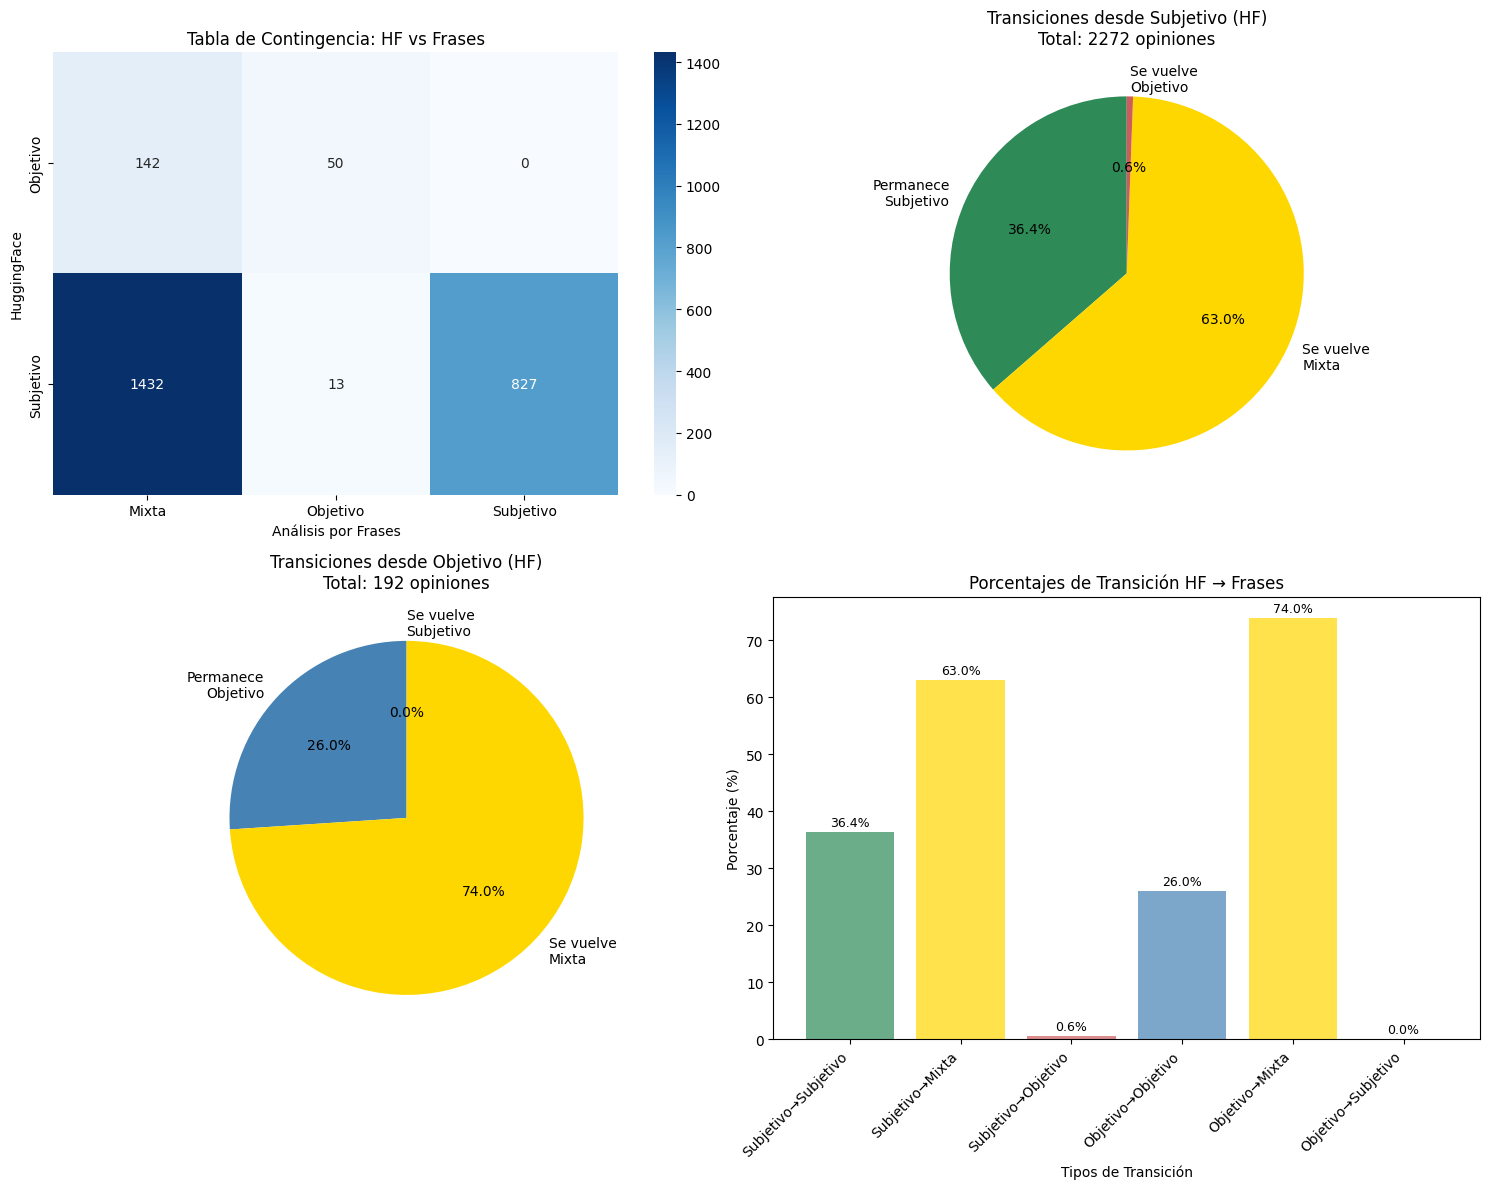

In [4]:
comparador.visualizar_comparacion_hf_frases(resultados_hf_frases)

## 3. Comparaci√≥n An√°lisis por Frases vs LLM (Solo Coincidencias)

An√°lisis enfocado √∫nicamente en las opiniones donde ambos m√©todos coinciden en la clasificaci√≥n.

In [5]:
resultados_frases_llm = comparador.comparar_frases_vs_llm_coincidencias()
comparador.mostrar_comparacion_frases_llm(resultados_frases_llm)

üîÑ COMPARACI√ìN: An√°lisis por Frases vs LLM (Solo Coincidencias)

üìä Tabla de Contingencia Completa:
SubjetividadConLLM     Mixta   All
SubjetividadConFrases             
Mixta                   1357  1357
Objetivo                  48    48
Subjetivo                420   420
All                     1825  1825

üéØ Resumen de Coincidencias:
   ‚Ä¢ Total de opiniones: 2464
   ‚Ä¢ Coincidencias totales: 1357
   ‚Ä¢ Porcentaje de coincidencia: 55.1%

üìà Coincidencias por Tipo:
   ‚Ä¢ Mixta: 1357 opiniones (86.2% de coincidencia)

üìã Distribuci√≥n en An√°lisis por Frases:
   ‚Ä¢ Mixta: 1574 (63.9%)
   ‚Ä¢ Subjetivo: 827 (33.6%)
   ‚Ä¢ Objetivo: 63 (2.6%)

üìã Distribuci√≥n en LLM:
   ‚Ä¢ Mixta: 1825 (74.1%)


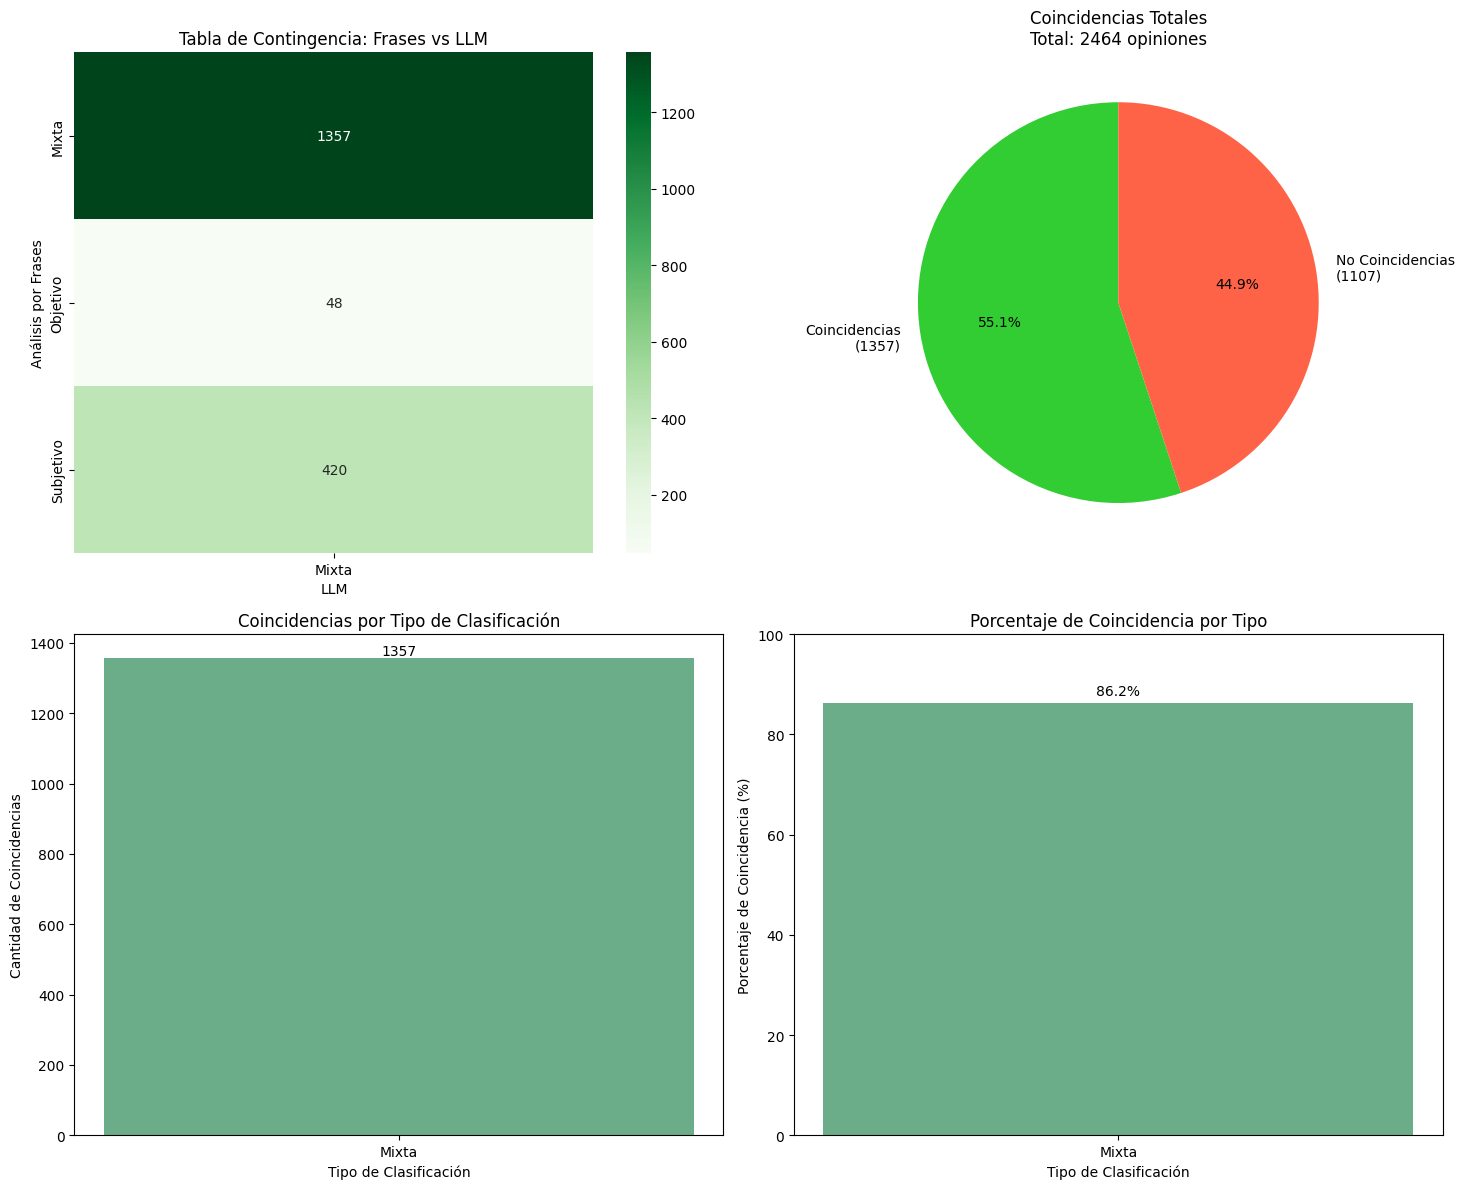

In [6]:
comparador.visualizar_comparacion_frases_llm(resultados_frases_llm)

## 4. Resumen Comparativo de M√©todos

An√°lisis de distribuciones y caracter√≠sticas de cada m√©todo para facilitar la selecci√≥n del mejor enfoque.

In [7]:
print("üìä RESUMEN DE DISTRIBUCIONES POR M√âTODO")
print("=" * 60)

metodos = ['SubjetividadConHF', 'SubjetividadConFrases', 'SubjetividadConLLM']
for metodo in metodos:
    if metodo in df.columns:
        print(f"\nüîπ {metodo}:")
        distribucion = df[metodo].value_counts()
        total = len(df)
        for categoria, cantidad in distribucion.items():
            porcentaje = (cantidad / total * 100)
            print(f"   ‚Ä¢ {categoria}: {cantidad} ({porcentaje:.1f}%)")

print(f"\nüìã Total de opiniones analizadas: {len(df)}")

üìä RESUMEN DE DISTRIBUCIONES POR M√âTODO

üîπ SubjetividadConHF:
   ‚Ä¢ Subjetivo: 2272 (92.2%)
   ‚Ä¢ Objetivo: 192 (7.8%)

üîπ SubjetividadConFrases:
   ‚Ä¢ Mixta: 1574 (63.9%)
   ‚Ä¢ Subjetivo: 827 (33.6%)
   ‚Ä¢ Objetivo: 63 (2.6%)

üîπ SubjetividadConLLM:
   ‚Ä¢ Mixta: 1825 (74.1%)
   ‚Ä¢ Subjetivo: 619 (25.1%)
   ‚Ä¢ Objetivo: 20 (0.8%)

üìã Total de opiniones analizadas: 2464


## 4.1. An√°lisis Detallado de Discrepancias

Examen de casos espec√≠ficos donde los m√©todos difieren en sus clasificaciones para entender mejor las fortalezas y debilidades de cada enfoque.

In [8]:
resultados_discrepancias = analizar_discrepancias_completas(df, n_ejemplos=3)


üîç AN√ÅLISIS DE DISCREPANCIAS ENTRE M√âTODOS
üìä M√©todos comparados: SubjetividadConHF vs SubjetividadConFrases
üìà Total de discrepancias: 1587
üìã Total de opiniones: 2464
üìä Porcentaje de discrepancias: 64.4%

üîÑ TIPOS DE DISCREPANCIAS:
--------------------------------------------------

üî∏ Subjetivo ‚Üí Mixta
   Cantidad: 1432 (90.2% de las discrepancias)
   
üìù Ejemplos:
      1. "Muy binito. Me gust√≥ mucho la experiencia de poder ver los shows? Es un lugar muy binito para ir a pasar el d√≠a tanto en familia como en pareja."
         SubjetividadConHF: Subjetivo | SubjetividadConFrases: Mixta

      2. "No te pierdas la Bas√≠lica de la Virgen de Guadalupe. Incre√≠ble vista para ver. Este es un destino de peregrinaci√≥n muy importante que cambi√≥ el curso de la historia de M√©xico. Me encant√≥ la misa en la Bas√≠lica, que es pr√°cticamente cada hora, subiendo la colina del Tepeyac y las capillas. Lo m√°s importante es que siempre quise ver la Tilma. La Sant√≠sima Ma

## 5. An√°lisis Cruzado: Subjetividad vs Sentimientos

An√°lisis de la distribuci√≥n de sentimientos para cada categor√≠a de subjetividad en los m√©todos ternarios (SubjetividadConFrases y SubjetividadConLLM).

**Configurable**: Se puede seleccionar entre SentimientoPorCardiff, SentimientoPorHF o SentimientoPorCalificacion.

In [9]:
from subjetividad import (
    AnalizadorCruzadoSentimientos,
    realizar_analisis_cruzado_completo,
    generar_visualizaciones_cruzadas
)

### Configuraci√≥n del An√°lisis

Selecci√≥n del m√©todo de sentimientos a utilizar en el an√°lisis cruzado.

In [10]:
# Configuraci√≥n: Cambiar aqu√≠ para usar diferente m√©todo de sentimientos
COLUMNA_SENTIMIENTO = 'SentimientoPorHF'  # Opciones: 'SentimientoPorCardiff', 'SentimientoPorHF', 'SentimientoPorCalificacion'

print(f"üéØ M√©todo de sentimientos seleccionado: {COLUMNA_SENTIMIENTO}")
print(f"üìä M√©todos de subjetividad a analizar: SubjetividadConFrases, SubjetividadConLLM")

üéØ M√©todo de sentimientos seleccionado: SentimientoPorHF
üìä M√©todos de subjetividad a analizar: SubjetividadConFrases, SubjetividadConLLM


### 5.1. An√°lisis SubjetividadConFrases vs Sentimientos

An√°lisis de c√≥mo se distribuyen los sentimientos en cada categor√≠a de subjetividad para el m√©todo de an√°lisis por frases.

In [11]:
analizador_cruzado = AnalizadorCruzadoSentimientos(df, COLUMNA_SENTIMIENTO)
resultados_frases = analizador_cruzado.analizar_metodo_subjetividad('SubjetividadConFrases')
analizador_cruzado.mostrar_resumen(resultados_frases)


üìä AN√ÅLISIS CRUZADO: SubjetividadConFrases vs SentimientoPorHF

üîπ Mixta:
   Total: 1574 opiniones (63.9%)
   Distribuci√≥n por sentimiento:
     ‚Ä¢ Positivo: 1273 (80.9%)
     ‚Ä¢ Negativo: 190 (12.1%)
     ‚Ä¢ Neutro: 111 (7.1%)

üîπ Subjetivo:
   Total: 827 opiniones (33.6%)
   Distribuci√≥n por sentimiento:
     ‚Ä¢ Positivo: 745 (90.1%)
     ‚Ä¢ Negativo: 53 (6.4%)
     ‚Ä¢ Neutro: 29 (3.5%)

üîπ Objetivo:
   Total: 63 opiniones (2.6%)
   Distribuci√≥n por sentimiento:
     ‚Ä¢ Positivo: 47 (74.6%)
     ‚Ä¢ Negativo: 8 (12.7%)
     ‚Ä¢ Neutro: 8 (12.7%)


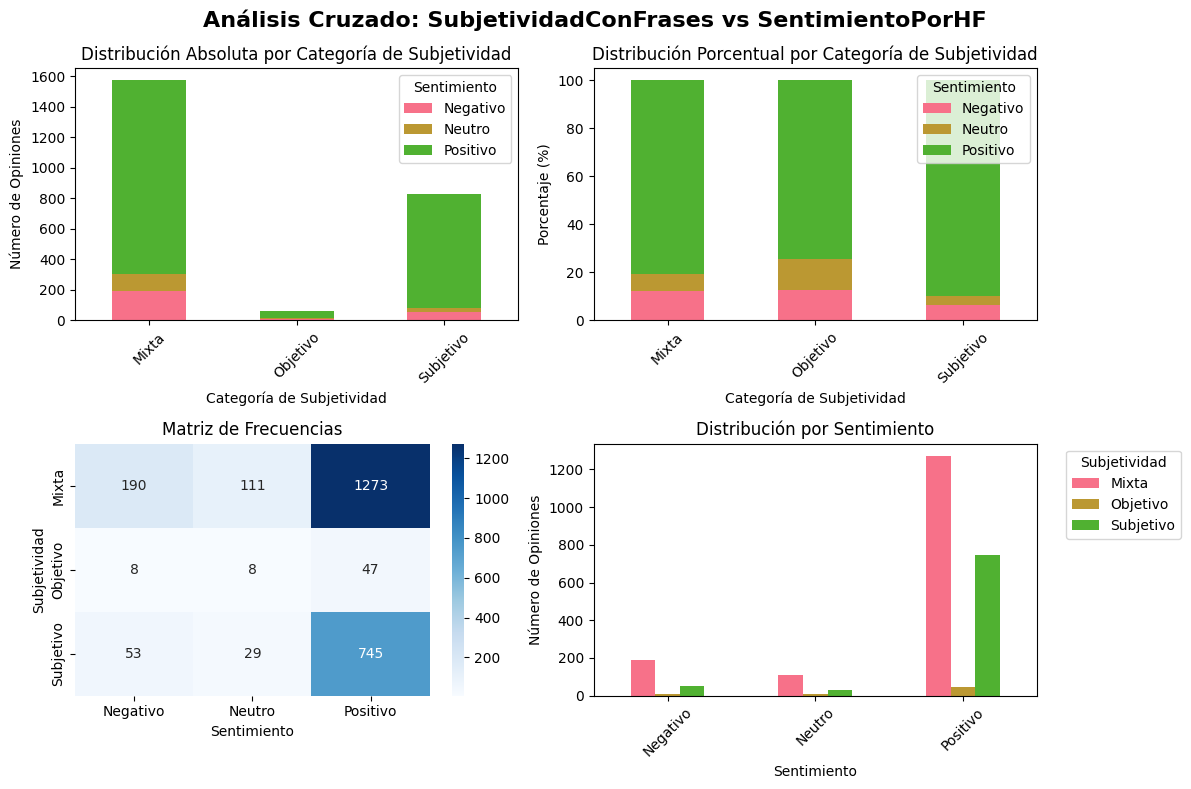

In [12]:
analizador_cruzado.visualizar_analisis(resultados_frases)

#### Ejemplos por Categor√≠a - SubjetividadConFrases

Ejemplos espec√≠ficos de opiniones para cada combinaci√≥n de subjetividad y sentimiento.

In [13]:
ejemplos_frases = analizador_cruzado.obtener_ejemplos_por_categoria('SubjetividadConFrases')
analizador_cruzado.mostrar_ejemplos(ejemplos_frases, 'SubjetividadConFrases')


üìù EJEMPLOS POR CATEGOR√çA - SubjetividadConFrases vs SentimientoPorHF

üè∑Ô∏è  CATEGOR√çA: Mixta
--------------------------------------------------

   üí≠ Positivo:

   üìç Ejemplo 1:
      üè® Mazatlan - Playa Cerritos
      üì∞ T√≠tulo: Un gran paseo con excelentes restaurantes.
      üí¨ Review: Muchas veces caminando por la playa hasta Marina El Cid - alrededor de 4. 5 millas de nada m√°s que arena y olas. ¬°Cielo en la tierra!


   üìç Ejemplo 2:
      üè® Cdmx - Museo Del Templo Mayor
      üì∞ T√≠tulo: A journey to the centre of the Aztec People.
      üí¨ Review: Wonderful experience to understand the culture and society of the Aztec People. Situated in the middle of Mexico City, beside the National Cathedral, this outdoor/indoor museum takes you right back in history. The museum starts outside displaying the internal chambers of the Aztec Temple. As you move through the complex you can see statues, internal seating areas and  temple decorations. The indoor museu

### 5.2. An√°lisis SubjetividadConLLM vs Sentimientos

An√°lisis de c√≥mo se distribuyen los sentimientos en cada categor√≠a de subjetividad para el m√©todo LLM.

In [14]:
resultados_llm = analizador_cruzado.analizar_metodo_subjetividad('SubjetividadConLLM')
analizador_cruzado.mostrar_resumen(resultados_llm)


üìä AN√ÅLISIS CRUZADO: SubjetividadConLLM vs SentimientoPorHF

üîπ Mixta:
   Total: 1825 opiniones (74.1%)
   Distribuci√≥n por sentimiento:
     ‚Ä¢ Positivo: 1513 (82.9%)
     ‚Ä¢ Negativo: 170 (9.3%)
     ‚Ä¢ Neutro: 142 (7.8%)

üîπ Subjetivo:
   Total: 619 opiniones (25.1%)
   Distribuci√≥n por sentimiento:
     ‚Ä¢ Positivo: 534 (86.3%)
     ‚Ä¢ Negativo: 79 (12.8%)
     ‚Ä¢ Neutro: 6 (1.0%)

üîπ Objetivo:
   Total: 20 opiniones (0.8%)
   Distribuci√≥n por sentimiento:
     ‚Ä¢ Positivo: 18 (90.0%)
     ‚Ä¢ Negativo: 2 (10.0%)


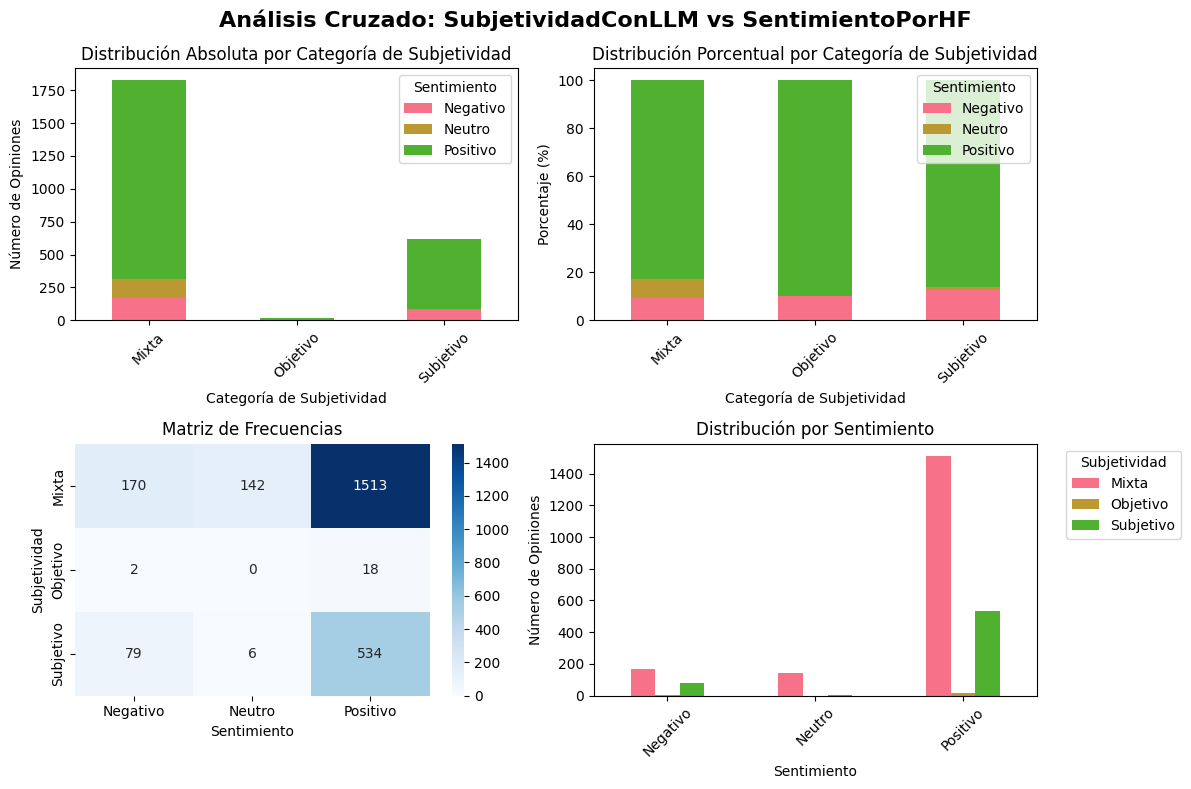

In [15]:
analizador_cruzado.visualizar_analisis(resultados_llm)

#### Ejemplos por Categor√≠a - SubjetividadConLLM

Ejemplos espec√≠ficos de opiniones para cada combinaci√≥n de subjetividad y sentimiento seg√∫n el m√©todo LLM.

In [16]:
ejemplos_llm = analizador_cruzado.obtener_ejemplos_por_categoria('SubjetividadConLLM')
analizador_cruzado.mostrar_ejemplos(ejemplos_llm, 'SubjetividadConLLM')


üìù EJEMPLOS POR CATEGOR√çA - SubjetividadConLLM vs SentimientoPorHF

üè∑Ô∏è  CATEGOR√çA: Mixta
--------------------------------------------------

   üí≠ Positivo:

   üìç Ejemplo 1:
      üè® Puerto_vallarta - Vallarta San Pancho
      üì∞ T√≠tulo: Un poco lejos en coche, pero bonita ciudad costera mexicana.
      üí¨ Review: Peque√±o y divertido pueblo mexicano tur√≠stico con una bonita playa. Menos invadido que Sayulita. Nos hemos alojado dos a√±os seguidos en un bonito hotel boutique. Tiene una calle principal muy transitada que es perpendicular y conduce a la playa. Hay algunas otras calles tranquilas. F√°cil acceso a pie a la playa pasando por bonitas tiendas y restaurantes.


   üìç Ejemplo 2:
      üè® Puebla - Zocalo De Puebla
      üì∞ T√≠tulo: Mucha historia
      üí¨ Review: El Z√≥calo De Puebla su lugar con historia con cultura donde puede uno pasar un rato agradable caminar comer en sus m√∫ltiples restaurantes incluso entrar a la catedral que es preciosa


  

### 5.3. Comparaci√≥n Visual entre M√©todos

Comparaci√≥n lado a lado de c√≥mo cada m√©todo distribuye los sentimientos por categor√≠a de subjetividad.

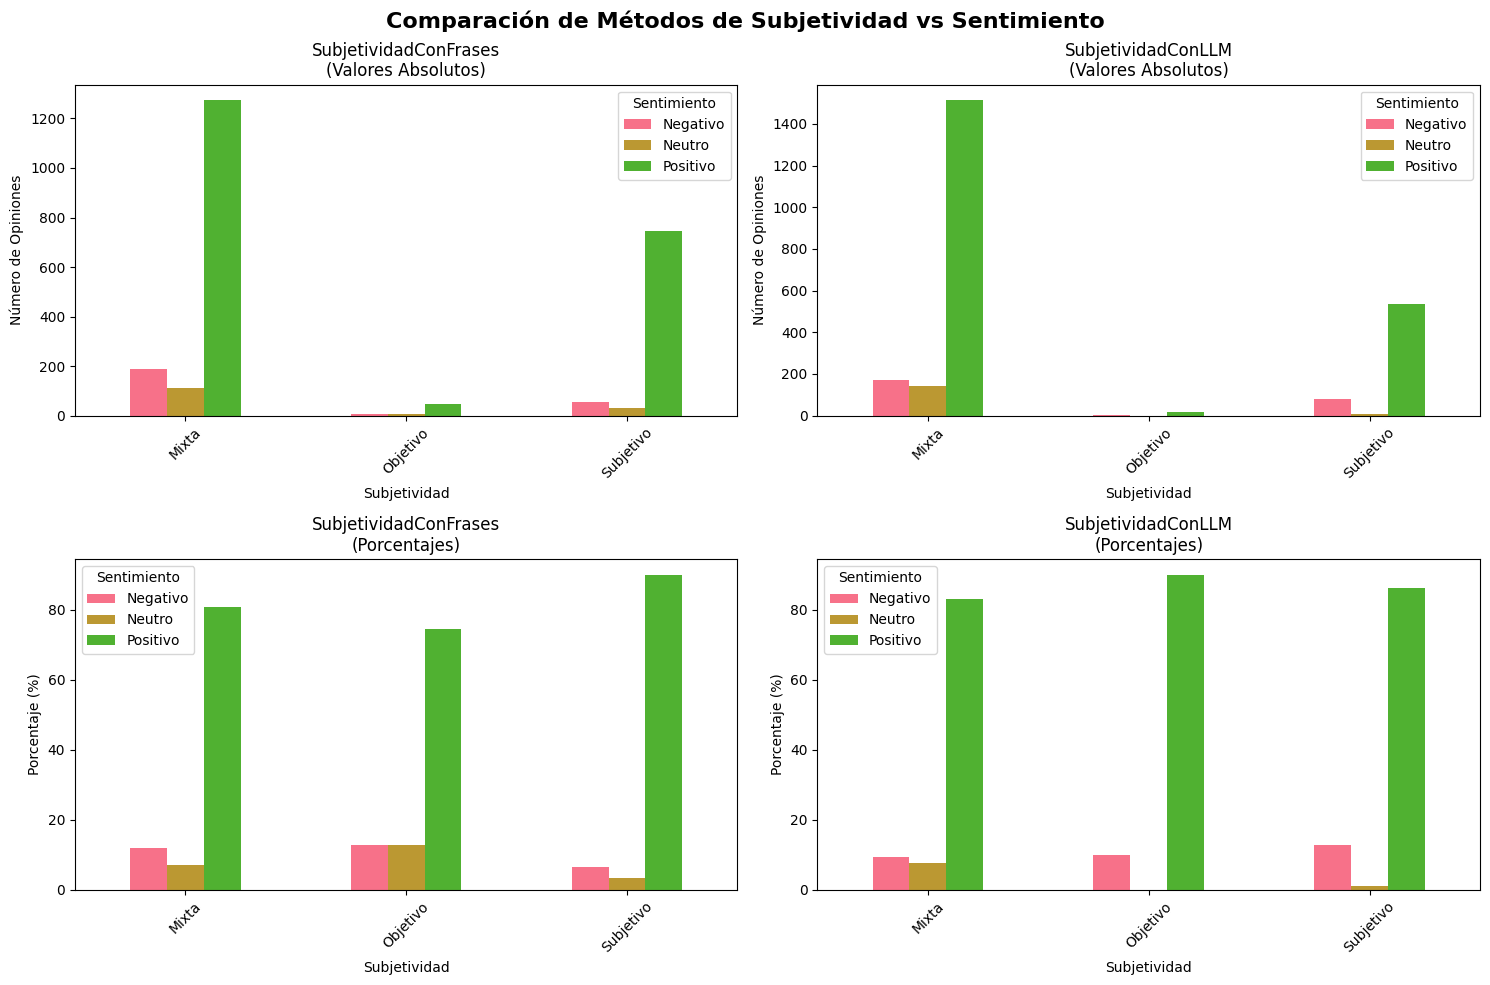

In [17]:
resultados_comparacion = {
    'SubjetividadConFrases': resultados_frases,
    'SubjetividadConLLM': resultados_llm
}
analizador_cruzado.visualizar_comparacion_metodos(resultados_comparacion)

## 6. Conclusiones del An√°lisis Cruzado

### Observaciones Clave:

**Distribuci√≥n por Sentimientos:**
- **Positivo**: An√°lisis de c√≥mo cada m√©todo clasifica las opiniones positivas seg√∫n subjetividad
- **Neutro**: Evaluaci√≥n de opiniones neutras y su clasificaci√≥n de subjetividad  
- **Negativo**: Comportamiento de cada m√©todo ante opiniones negativas

**Comparaci√≥n entre M√©todos:**
- **SubjetividadConFrases**: Ofrece clasificaci√≥n ternaria con detecci√≥n de opiniones mixtas
- **SubjetividadConLLM**: Proporciona an√°lisis m√°s matizado con mayor granularidad

**Patrones Identificados:**
- Relaci√≥n entre la intensidad del sentimiento y la subjetividad detectada
- Diferencias en la clasificaci√≥n de opiniones mixtas entre m√©todos
- Consistencia en la detecci√≥n de patrones emocionales

Este an√°lisis permite seleccionar el m√©todo m√°s adecuado seg√∫n los objetivos espec√≠ficos del an√°lisis de opiniones tur√≠sticas.